1. DECISION TREE

1.1 DATA COLLECTION

In [1]:
import pandas as pd

lung_cancer_detection = pd.read_csv("lung_cancer_detection.csv")
lung_cancer_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [2]:
lung_cancer_detection.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


1.2 DATA PREPARATION

In [3]:
from sklearn.model_selection import train_test_split

y = lung_cancer_detection[['LUNG_CANCER']]
x = lung_cancer_detection.drop(columns = ["LUNG_CANCER","GENDER"])
x_train, x_test, y_train, y_test = train_test_split(
    x,y,test_size=0.2,stratify=y,random_state=123
)
x_train.shape, x_test.shape

((247, 14), (62, 14))

1.3 MODEL TRAINING

In [12]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(
    criterion = "entropy",
    random_state = 1234
)

model = dtc.fit(x_train,y_train)

y_pred = dtc.predict(x_test)

model.score(x_test,y_test)
#model.score(x_train,y_train)

0.8870967741935484

1.4 MODEL VISUALIZATION

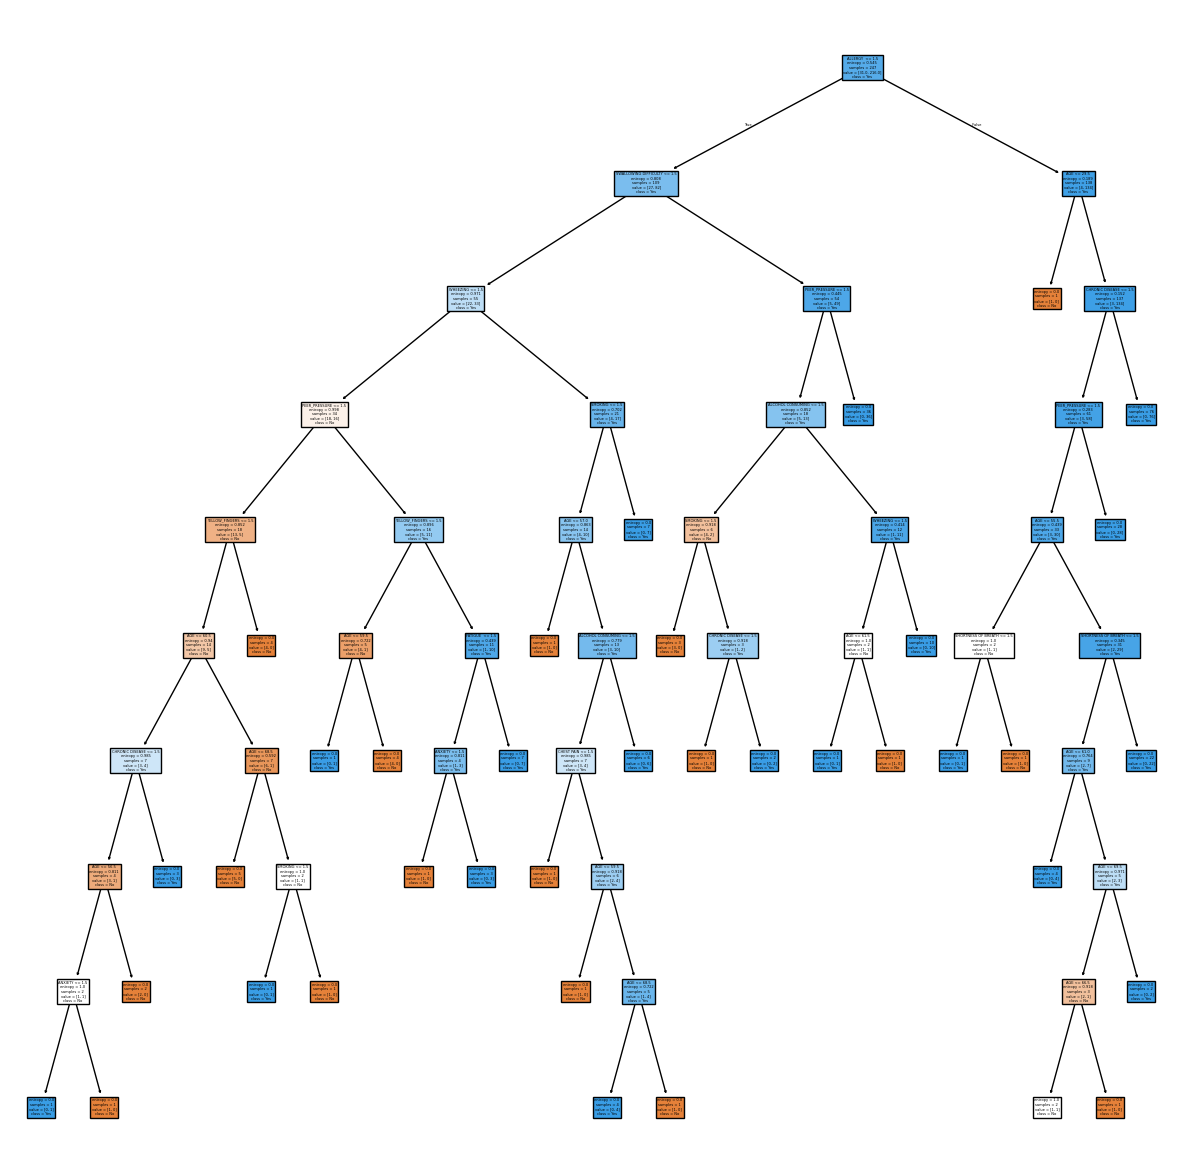

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,15))
tree.plot_tree(
    model,
    feature_names = list(x.columns),
    class_names = ['No','Yes'],
    filled = True
);

importance = model.feature_importances_
feature_importance = pd.Series(importance,index=x.columns)
#feature_importance.plot(kind='bar')
plt.ylabel('Importance');

1.5 MODEL CONFUSION MATRIX

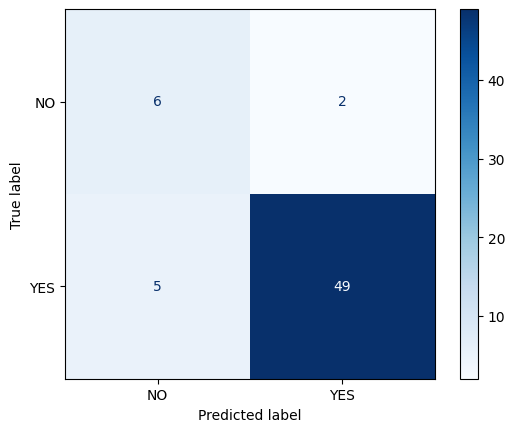

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cmatrix = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=dtc.classes_)
disp.plot(cmap='Blues')

In [19]:
from sklearn.metrics import classification_report, accuracy_score
creport = classification_report(y_test,y_pred)
ascore = accuracy_score(y_test,y_pred)
print("Accuracy: ", ascore)
print(creport)

Accuracy:  0.8870967741935484
              precision    recall  f1-score   support

          NO       0.55      0.75      0.63         8
         YES       0.96      0.91      0.93        54

    accuracy                           0.89        62
   macro avg       0.75      0.83      0.78        62
weighted avg       0.91      0.89      0.89        62

